In [5]:
import numpy as np
from quam_libs.components import QuAM, TransmonPair
from quam_libs.experiments.two_qubit_xeb import (
    XEBConfig,
    XEB,
    backend as fake_backend,
    QUAGate,
)

machine = QuAM.load()
qubits = machine.active_qubits
# Get the relevant QuAM components
target_qubit_indices = [1]  # Indices of the target qubits
target_qubits = [qubits[i] for i in target_qubit_indices]
target_qubit_pairs = [
    qubit_pair
    for qubit_pair in machine.active_qubit_pairs
    if qubit_pair.qubit_control in target_qubits and qubit_pair.qubit_target in target_qubits
]

print("target_qubits: %s" %[q.name for q in target_qubits]) 


def cz_gate(qubit_pair: TransmonPair):
    """
    CZ gate QUA macro: Add your own QUA code here implementing your CZ gate for any given qubit pair
    :param qubit_pair: TransmonPair instance on which to apply the gate
    :return: None
    """

    pass


cz_qua = QUAGate("cz", cz_gate)

xeb_config = XEBConfig(
    seqs=87, #81,
    depths=np.arange(1, 1200, 24),
    # depths=np.arange(1, 9, 1),
    n_shots=700, #1000,
    readout_qubits=qubits, 
    qubits=target_qubits,
    qubit_pairs=target_qubit_pairs,
    baseline_gate_name="x90",
    gate_set_choice="sw",
    two_qb_gate=None, #cz_qua,
    save_dir="",
    should_save_data=False, #True,
    generate_new_data=True,
    disjoint_processing=False, #False,
    # reset_method="active",
    # reset_kwargs={"max_tries": 3, "pi_pulse": "x180"},
    reset_method="cooldown", #"active",
    reset_kwargs={"cooldown_time": 100000, "max_tries": 3, "pi_pulse": "x180"},
)

simulate = False  # Set to True to simulate the experiment with Qiskit Aer instead of running it on the QPU
xeb = XEB(xeb_config, quam=machine)
if simulate:
    job = xeb.simulate(backend=fake_backend)
else:
    job = xeb.run(simulate=False)  # If simulate is False, job is run on the QPU, else pulse output is simulated

# 87 * 500/12 * 1000 = 13m 26.8s 
# 87 * 1200/24 * 700 = 22m 42.3s


target_qubits: ['q2']
ge_thresholds[0]: 0.0001859226735423066


/Users/adamachuck/Documents/GitHub/ASQUM/qua-libs/Quantum-Control-Applications-QuAM/Superconducting/quam_libs/experiments/two_qubit_xeb/xeb.py:53: UserWarning: No qubit pairs provided. The experiment will run with single qubit gates only.
  warn("No qubit pairs provided. The experiment will run with single qubit gates only.")


2024-10-21 00:35:02,291 - qm - INFO     - Performing health check
2024-10-21 00:35:02,303 - qm - INFO     - Cluster healthcheck completed successfully.
2024-10-21 00:35:15,213 - qm - INFO     - Adding program to queue.


/Users/adamachuck/anaconda3/envs/QPX/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


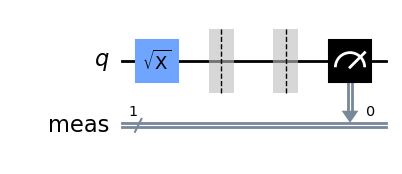

In [9]:
job.circuits[0][0].draw("mpl") # job.circuits[seq][depth] 

/Users/adamachuck/Documents/GitHub/ASQUM/qua-libs/Quantum-Control-Applications-QuAM/Superconducting/quam_libs/experiments/two_qubit_xeb/xeb.py:671: RuntimeWarning: invalid value encountered in scalar divide
  f_xeb = (xe_incoherent - xe_measured) / (xe_incoherent - xe_expected)
/Users/adamachuck/Documents/GitHub/ASQUM/qua-libs/Quantum-Control-Applications-QuAM/Superconducting/quam_libs/experiments/two_qubit_xeb/xeb.py:671: RuntimeWarning: divide by zero encountered in scalar divide
  f_xeb = (xe_incoherent - xe_measured) / (xe_incoherent - xe_expected)


/Users/adamachuck/Documents/GitHub/ASQUM/qua-libs/Quantum-Control-Applications-QuAM/Superconducting/quam_libs/experiments/two_qubit_xeb/xeb.py:854: RuntimeWarning: Mean of empty slice
  Fxeb = np.nanmean(self.log_fidelities, axis=0)


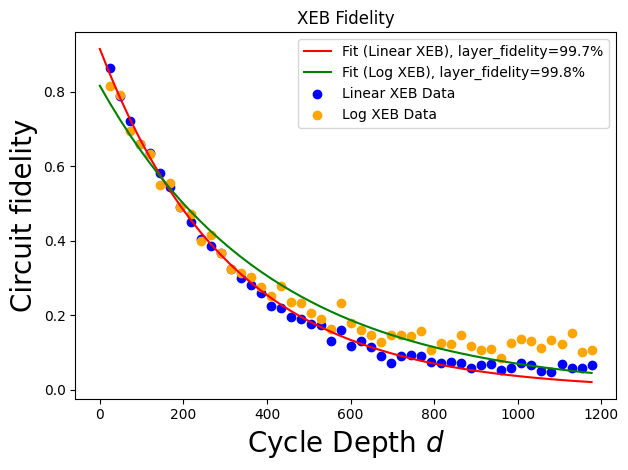

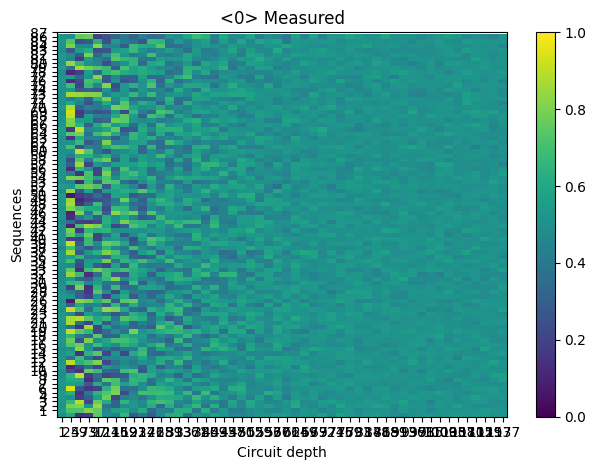

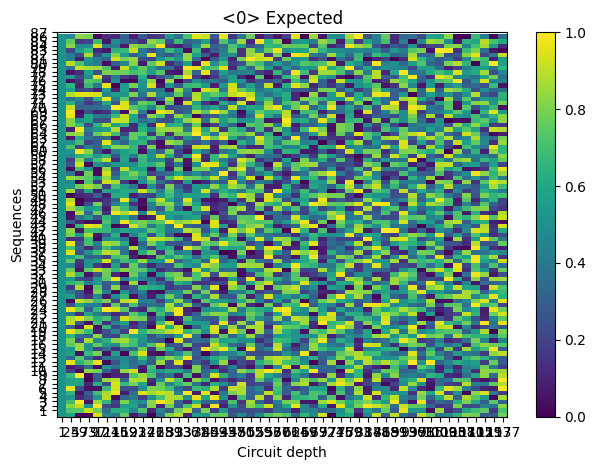

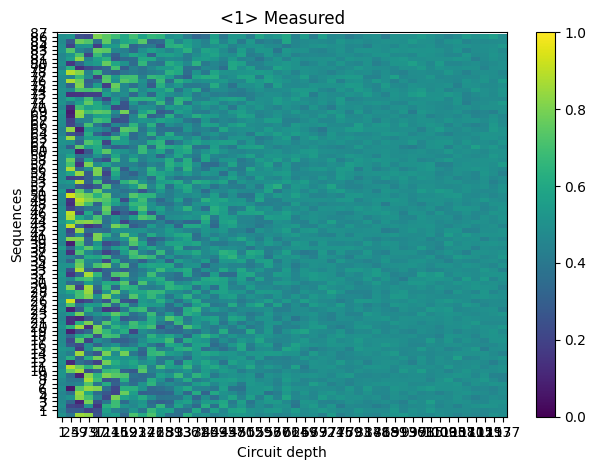

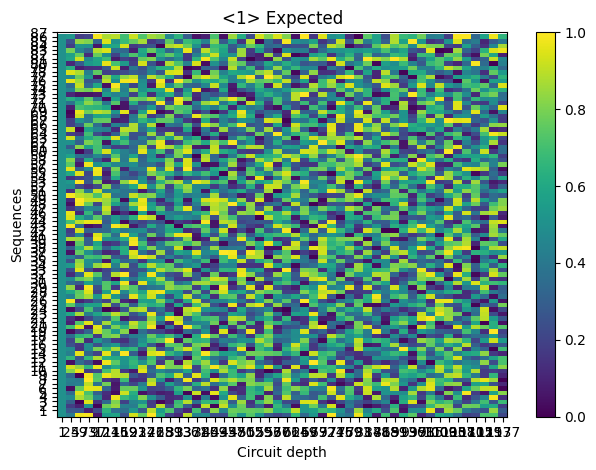

In [7]:

result = job.result()
# print(result.saved_data)

result.plot_fidelities()

# result.plot_records() # bug?
result.plot_state_heatmap()

# 87 * 1200/24 * 700 = 1m 40.6s (classical simulation?)


In [8]:
print(result.saved_data)

{'quadratures': {'I0': array([[4.72000981e-04, 3.43979054e-04, 9.07304218e-04, ...,
        4.28717482e-04, 4.77124490e-04, 4.57633712e-04],
       [4.32917162e-04, 2.17781163e-04, 2.17751744e-04, ...,
        4.24861951e-04, 4.40966301e-04, 4.46072061e-04],
       [4.62791004e-04, 1.21130911e-04, 9.51770800e-05, ...,
        5.02720002e-04, 4.81448706e-04, 4.63597056e-04],
       ...,
       [4.74187466e-04, 1.12414807e-04, 5.00921948e-04, ...,
        4.66048483e-04, 4.64930593e-04, 5.18500768e-04],
       [4.43148703e-04, 2.01436797e-04, 8.14894826e-04, ...,
        4.47124684e-04, 4.52286952e-04, 4.64498933e-04],
       [4.57766354e-04, 4.92290599e-04, 1.61876375e-04, ...,
        5.02287623e-04, 5.49998629e-04, 4.58064989e-04]]), 'Q0': array([[-0.0004825 , -0.00047313, -0.00047408, ..., -0.00047491,
        -0.00048116, -0.00048236],
       [-0.0004844 , -0.00048085, -0.00048724, ..., -0.00048248,
        -0.0004792 , -0.00048537],
       [-0.00048116, -0.00048652, -0.00048417, ..